In [1]:
import pandas as pd
import numpy as np
from eagle import EagleRouter

In [3]:
df_val = pd.read_parquet("data/val_100.parquet")

# Grid search for hyperparameter optimization
import itertools
from tqdm import tqdm

# Define hyperparameter search space
P_values = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9]  # Weight for global vs local scores
N_values = [5, 10, 20, 30, 50, 70, 100]  # Number of nearest neighbors
K_values = [16, 24, 32, 40, 48, 64, 128]  # ELO sensitivity

# Store results
results = []

print("Starting hyperparameter optimization...")
print(f"Total combinations to test: {len(P_values) * len(N_values) * len(K_values)}")

# Grid search
for P, N, K in tqdm(itertools.product(P_values, N_values, K_values), 
                    total=len(P_values) * len(N_values) * len(K_values),
                    desc="Grid Search"):
    
    # Initialize router with current hyperparameters
    router = EagleRouter(P=P, N=N, K=K)
    
    # Train global scores
    router.train_global_scores()
    
    # Evaluate on validation set
    correct = 0
    for i in range(len(df_val)):
        row = df_val.iloc[i]
        query_prompt_embedding = row["prompt_embedding"]
        gold_model = (
            "gpt-4o-2024-08-06"
            if row["gpt-4o-2024-08-06/score"] > row["gpt-4o-mini-2024-07-18/score"]
            else "gpt-4o-mini-2024-07-18"
        )
        chosen_model = router.route(query_prompt_embedding)
        if chosen_model == gold_model:
            correct += 1
    
    accuracy = correct / len(df_val)
    
    # Store results
    results.append({
        'P': P,
        'N': N,
        'K': K,
        'accuracy': accuracy
    })
    
    print(f"P={P}, N={N}, K={K} -> Accuracy: {accuracy:.3f}")

# Convert to DataFrame for analysis
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('accuracy', ascending=False)

print("\n" + "="*50)
print("Top 10 Best Hyperparameter Combinations:")
print("="*50)
print(results_df.head(10).to_string(index=False))

# Find best hyperparameters
best_params = results_df.iloc[0]
print("\n" + "="*50)
print("Best Hyperparameters Found:")
print(f"P = {best_params['P']}")
print(f"N = {best_params['N']}")
print(f"K = {best_params['K']}")
print(f"Validation Accuracy = {best_params['accuracy']:.4f}")
print("="*50)

Starting hyperparameter optimization...
Total combinations to test: 294


Grid Search:   0%|          | 1/294 [00:00<00:29,  9.90it/s]

P=0.01, N=5, K=16 -> Accuracy: 0.940
P=0.01, N=5, K=24 -> Accuracy: 0.940


Grid Search:   1%|          | 3/294 [00:00<00:27, 10.65it/s]

P=0.01, N=5, K=32 -> Accuracy: 0.940


Grid Search:   2%|▏         | 5/294 [00:00<00:26, 10.84it/s]

P=0.01, N=5, K=40 -> Accuracy: 0.940
P=0.01, N=5, K=48 -> Accuracy: 0.930
P=0.01, N=5, K=64 -> Accuracy: 0.900


Grid Search:   2%|▏         | 7/294 [00:00<00:26, 10.80it/s]

P=0.01, N=5, K=128 -> Accuracy: 0.820
P=0.01, N=10, K=16 -> Accuracy: 0.940


Grid Search:   3%|▎         | 9/294 [00:00<00:28, 10.09it/s]

P=0.01, N=10, K=24 -> Accuracy: 0.940
P=0.01, N=10, K=32 -> Accuracy: 0.920


Grid Search:   4%|▎         | 11/294 [00:01<00:28, 10.10it/s]

P=0.01, N=10, K=40 -> Accuracy: 0.860


Grid Search:   4%|▍         | 13/294 [00:01<00:27, 10.09it/s]

P=0.01, N=10, K=48 -> Accuracy: 0.820
P=0.01, N=10, K=64 -> Accuracy: 0.790
P=0.01, N=10, K=128 -> Accuracy: 0.720


Grid Search:   5%|▌         | 15/294 [00:01<00:28,  9.92it/s]

P=0.01, N=20, K=16 -> Accuracy: 0.940


Grid Search:   5%|▌         | 16/294 [00:01<00:28,  9.72it/s]

P=0.01, N=20, K=24 -> Accuracy: 0.910


Grid Search:   6%|▌         | 17/294 [00:01<00:29,  9.50it/s]

P=0.01, N=20, K=32 -> Accuracy: 0.870


Grid Search:   6%|▌         | 18/294 [00:01<00:29,  9.37it/s]

P=0.01, N=20, K=40 -> Accuracy: 0.850


Grid Search:   6%|▋         | 19/294 [00:01<00:29,  9.24it/s]

P=0.01, N=20, K=48 -> Accuracy: 0.850


Grid Search:   7%|▋         | 20/294 [00:02<00:30,  9.11it/s]

P=0.01, N=20, K=64 -> Accuracy: 0.850


Grid Search:   7%|▋         | 21/294 [00:02<00:34,  7.94it/s]

P=0.01, N=20, K=128 -> Accuracy: 0.760


Grid Search:   7%|▋         | 22/294 [00:02<00:33,  8.00it/s]

P=0.01, N=30, K=16 -> Accuracy: 0.920


Grid Search:   8%|▊         | 23/294 [00:02<00:33,  8.00it/s]

P=0.01, N=30, K=24 -> Accuracy: 0.930


Grid Search:   8%|▊         | 24/294 [00:02<00:33,  8.09it/s]

P=0.01, N=30, K=32 -> Accuracy: 0.910


Grid Search:   9%|▊         | 25/294 [00:02<00:33,  8.09it/s]

P=0.01, N=30, K=40 -> Accuracy: 0.890


Grid Search:   9%|▉         | 26/294 [00:02<00:33,  8.07it/s]

P=0.01, N=30, K=48 -> Accuracy: 0.870


Grid Search:   9%|▉         | 27/294 [00:02<00:33,  8.04it/s]

P=0.01, N=30, K=64 -> Accuracy: 0.820


Grid Search:  10%|▉         | 28/294 [00:03<00:32,  8.08it/s]

P=0.01, N=30, K=128 -> Accuracy: 0.800


Grid Search:  10%|▉         | 29/294 [00:03<00:34,  7.74it/s]

P=0.01, N=50, K=16 -> Accuracy: 0.910


Grid Search:  10%|█         | 30/294 [00:03<00:35,  7.44it/s]

P=0.01, N=50, K=24 -> Accuracy: 0.890


Grid Search:  11%|█         | 31/294 [00:03<00:36,  7.28it/s]

P=0.01, N=50, K=32 -> Accuracy: 0.880


Grid Search:  11%|█         | 32/294 [00:03<00:36,  7.17it/s]

P=0.01, N=50, K=40 -> Accuracy: 0.860


Grid Search:  11%|█         | 33/294 [00:03<00:36,  7.11it/s]

P=0.01, N=50, K=48 -> Accuracy: 0.830


Grid Search:  12%|█▏        | 34/294 [00:03<00:36,  7.09it/s]

P=0.01, N=50, K=64 -> Accuracy: 0.790


Grid Search:  12%|█▏        | 35/294 [00:04<00:36,  7.14it/s]

P=0.01, N=50, K=128 -> Accuracy: 0.690


Grid Search:  12%|█▏        | 36/294 [00:04<00:37,  6.88it/s]

P=0.01, N=70, K=16 -> Accuracy: 0.910


Grid Search:  13%|█▎        | 37/294 [00:04<00:38,  6.64it/s]

P=0.01, N=70, K=24 -> Accuracy: 0.910


Grid Search:  13%|█▎        | 38/294 [00:04<00:39,  6.48it/s]

P=0.01, N=70, K=32 -> Accuracy: 0.900


Grid Search:  14%|█▎        | 40/294 [00:04<00:44,  5.73it/s]

P=0.01, N=70, K=40 -> Accuracy: 0.890
P=0.01, N=70, K=48 -> Accuracy: 0.880


Grid Search:  14%|█▍        | 42/294 [00:05<00:43,  5.78it/s]

P=0.01, N=70, K=64 -> Accuracy: 0.850
P=0.01, N=70, K=128 -> Accuracy: 0.730


Grid Search:  15%|█▍        | 44/294 [00:05<00:45,  5.45it/s]

P=0.01, N=100, K=16 -> Accuracy: 0.910
P=0.01, N=100, K=24 -> Accuracy: 0.880


Grid Search:  16%|█▌        | 46/294 [00:06<00:47,  5.23it/s]

P=0.01, N=100, K=32 -> Accuracy: 0.850
P=0.01, N=100, K=40 -> Accuracy: 0.840


Grid Search:  16%|█▋        | 48/294 [00:06<00:46,  5.30it/s]

P=0.01, N=100, K=48 -> Accuracy: 0.840
P=0.01, N=100, K=64 -> Accuracy: 0.810


Grid Search:  17%|█▋        | 51/294 [00:06<00:35,  6.82it/s]

P=0.01, N=100, K=128 -> Accuracy: 0.680
P=0.1, N=5, K=16 -> Accuracy: 0.940
P=0.1, N=5, K=24 -> Accuracy: 0.940


Grid Search:  18%|█▊        | 53/294 [00:07<00:30,  7.83it/s]

P=0.1, N=5, K=32 -> Accuracy: 0.940
P=0.1, N=5, K=40 -> Accuracy: 0.940
P=0.1, N=5, K=48 -> Accuracy: 0.940


Grid Search:  19%|█▉        | 56/294 [00:07<00:26,  8.93it/s]

P=0.1, N=5, K=64 -> Accuracy: 0.910
P=0.1, N=5, K=128 -> Accuracy: 0.870


Grid Search:  20%|█▉        | 58/294 [00:07<00:25,  9.24it/s]

P=0.1, N=10, K=16 -> Accuracy: 0.940
P=0.1, N=10, K=24 -> Accuracy: 0.940


Grid Search:  20%|██        | 60/294 [00:07<00:28,  8.32it/s]

P=0.1, N=10, K=32 -> Accuracy: 0.930
P=0.1, N=10, K=40 -> Accuracy: 0.890


Grid Search:  21%|██        | 62/294 [00:08<00:26,  8.85it/s]

P=0.1, N=10, K=48 -> Accuracy: 0.860
P=0.1, N=10, K=64 -> Accuracy: 0.820


Grid Search:  22%|██▏       | 64/294 [00:08<00:25,  9.09it/s]

P=0.1, N=10, K=128 -> Accuracy: 0.710
P=0.1, N=20, K=16 -> Accuracy: 0.940


Grid Search:  22%|██▏       | 66/294 [00:08<00:25,  8.89it/s]

P=0.1, N=20, K=24 -> Accuracy: 0.920
P=0.1, N=20, K=32 -> Accuracy: 0.890


Grid Search:  23%|██▎       | 68/294 [00:08<00:25,  8.72it/s]

P=0.1, N=20, K=40 -> Accuracy: 0.870
P=0.1, N=20, K=48 -> Accuracy: 0.880


Grid Search:  24%|██▍       | 70/294 [00:08<00:25,  8.65it/s]

P=0.1, N=20, K=64 -> Accuracy: 0.860
P=0.1, N=20, K=128 -> Accuracy: 0.780


Grid Search:  24%|██▍       | 72/294 [00:09<00:26,  8.37it/s]

P=0.1, N=30, K=16 -> Accuracy: 0.940
P=0.1, N=30, K=24 -> Accuracy: 0.940


Grid Search:  25%|██▌       | 74/294 [00:09<00:30,  7.29it/s]

P=0.1, N=30, K=32 -> Accuracy: 0.940
P=0.1, N=30, K=40 -> Accuracy: 0.920


Grid Search:  26%|██▌       | 76/294 [00:09<00:28,  7.65it/s]

P=0.1, N=30, K=48 -> Accuracy: 0.880
P=0.1, N=30, K=64 -> Accuracy: 0.890


Grid Search:  27%|██▋       | 78/294 [00:10<00:29,  7.22it/s]

P=0.1, N=30, K=128 -> Accuracy: 0.820
P=0.1, N=50, K=16 -> Accuracy: 0.920


Grid Search:  27%|██▋       | 80/294 [00:10<00:33,  6.47it/s]

P=0.1, N=50, K=24 -> Accuracy: 0.890
P=0.1, N=50, K=32 -> Accuracy: 0.890


Grid Search:  28%|██▊       | 82/294 [00:10<00:31,  6.73it/s]

P=0.1, N=50, K=40 -> Accuracy: 0.870
P=0.1, N=50, K=48 -> Accuracy: 0.870


Grid Search:  29%|██▊       | 84/294 [00:10<00:31,  6.76it/s]

P=0.1, N=50, K=64 -> Accuracy: 0.830
P=0.1, N=50, K=128 -> Accuracy: 0.740


Grid Search:  29%|██▉       | 86/294 [00:11<00:32,  6.41it/s]

P=0.1, N=70, K=16 -> Accuracy: 0.930
P=0.1, N=70, K=24 -> Accuracy: 0.910


Grid Search:  30%|██▉       | 88/294 [00:11<00:33,  6.09it/s]

P=0.1, N=70, K=32 -> Accuracy: 0.920
P=0.1, N=70, K=40 -> Accuracy: 0.900


Grid Search:  31%|███       | 90/294 [00:11<00:33,  6.14it/s]

P=0.1, N=70, K=48 -> Accuracy: 0.890
P=0.1, N=70, K=64 -> Accuracy: 0.850


Grid Search:  31%|███▏      | 92/294 [00:12<00:34,  5.81it/s]

P=0.1, N=70, K=128 -> Accuracy: 0.760
P=0.1, N=100, K=16 -> Accuracy: 0.930


Grid Search:  32%|███▏      | 94/294 [00:12<00:36,  5.45it/s]

P=0.1, N=100, K=24 -> Accuracy: 0.880
P=0.1, N=100, K=32 -> Accuracy: 0.890


Grid Search:  33%|███▎      | 96/294 [00:13<00:37,  5.35it/s]

P=0.1, N=100, K=40 -> Accuracy: 0.860
P=0.1, N=100, K=48 -> Accuracy: 0.850


Grid Search:  33%|███▎      | 98/294 [00:13<00:37,  5.28it/s]

P=0.1, N=100, K=64 -> Accuracy: 0.840
P=0.1, N=100, K=128 -> Accuracy: 0.730


Grid Search:  34%|███▍      | 101/294 [00:13<00:25,  7.46it/s]

P=0.3, N=5, K=16 -> Accuracy: 0.940
P=0.3, N=5, K=24 -> Accuracy: 0.940
P=0.3, N=5, K=32 -> Accuracy: 0.940


Grid Search:  35%|███▌      | 104/294 [00:14<00:21,  8.74it/s]

P=0.3, N=5, K=40 -> Accuracy: 0.940
P=0.3, N=5, K=48 -> Accuracy: 0.940
P=0.3, N=5, K=64 -> Accuracy: 0.940


Grid Search:  36%|███▌      | 106/294 [00:14<00:20,  9.09it/s]

P=0.3, N=5, K=128 -> Accuracy: 0.890
P=0.3, N=10, K=16 -> Accuracy: 0.940


Grid Search:  36%|███▋      | 107/294 [00:14<00:20,  9.15it/s]

P=0.3, N=10, K=24 -> Accuracy: 0.940


Grid Search:  37%|███▋      | 109/294 [00:14<00:24,  7.53it/s]

P=0.3, N=10, K=32 -> Accuracy: 0.940
P=0.3, N=10, K=40 -> Accuracy: 0.940


Grid Search:  38%|███▊      | 111/294 [00:14<00:21,  8.36it/s]

P=0.3, N=10, K=48 -> Accuracy: 0.930
P=0.3, N=10, K=64 -> Accuracy: 0.890


Grid Search:  38%|███▊      | 113/294 [00:15<00:21,  8.57it/s]

P=0.3, N=10, K=128 -> Accuracy: 0.800
P=0.3, N=20, K=16 -> Accuracy: 0.940


Grid Search:  39%|███▉      | 115/294 [00:15<00:20,  8.62it/s]

P=0.3, N=20, K=24 -> Accuracy: 0.940
P=0.3, N=20, K=32 -> Accuracy: 0.940


Grid Search:  40%|███▉      | 117/294 [00:15<00:20,  8.66it/s]

P=0.3, N=20, K=40 -> Accuracy: 0.930
P=0.3, N=20, K=48 -> Accuracy: 0.920


Grid Search:  40%|████      | 119/294 [00:15<00:19,  8.76it/s]

P=0.3, N=20, K=64 -> Accuracy: 0.910
P=0.3, N=20, K=128 -> Accuracy: 0.890


Grid Search:  41%|████      | 121/294 [00:16<00:20,  8.39it/s]

P=0.3, N=30, K=16 -> Accuracy: 0.940
P=0.3, N=30, K=24 -> Accuracy: 0.940


Grid Search:  42%|████▏     | 123/294 [00:16<00:20,  8.25it/s]

P=0.3, N=30, K=32 -> Accuracy: 0.950
P=0.3, N=30, K=40 -> Accuracy: 0.960


Grid Search:  43%|████▎     | 125/294 [00:16<00:20,  8.20it/s]

P=0.3, N=30, K=48 -> Accuracy: 0.960
P=0.3, N=30, K=64 -> Accuracy: 0.950


Grid Search:  43%|████▎     | 127/294 [00:16<00:22,  7.57it/s]

P=0.3, N=30, K=128 -> Accuracy: 0.920
P=0.3, N=50, K=16 -> Accuracy: 0.930


Grid Search:  44%|████▍     | 129/294 [00:17<00:25,  6.42it/s]

P=0.3, N=50, K=24 -> Accuracy: 0.930
P=0.3, N=50, K=32 -> Accuracy: 0.900


Grid Search:  45%|████▍     | 131/294 [00:17<00:25,  6.29it/s]

P=0.3, N=50, K=40 -> Accuracy: 0.890
P=0.3, N=50, K=48 -> Accuracy: 0.890


Grid Search:  45%|████▌     | 133/294 [00:17<00:26,  6.04it/s]

P=0.3, N=50, K=64 -> Accuracy: 0.870
P=0.3, N=50, K=128 -> Accuracy: 0.820


Grid Search:  46%|████▌     | 135/294 [00:18<00:26,  5.89it/s]

P=0.3, N=70, K=16 -> Accuracy: 0.940
P=0.3, N=70, K=24 -> Accuracy: 0.940


Grid Search:  47%|████▋     | 137/294 [00:18<00:28,  5.55it/s]

P=0.3, N=70, K=32 -> Accuracy: 0.920
P=0.3, N=70, K=40 -> Accuracy: 0.920


Grid Search:  47%|████▋     | 139/294 [00:18<00:26,  5.84it/s]

P=0.3, N=70, K=48 -> Accuracy: 0.940
P=0.3, N=70, K=64 -> Accuracy: 0.930


Grid Search:  48%|████▊     | 141/294 [00:19<00:26,  5.71it/s]

P=0.3, N=70, K=128 -> Accuracy: 0.870
P=0.3, N=100, K=16 -> Accuracy: 0.940


Grid Search:  48%|████▊     | 142/294 [00:19<00:30,  4.90it/s]

P=0.3, N=100, K=24 -> Accuracy: 0.940


Grid Search:  49%|████▊     | 143/294 [00:19<00:31,  4.81it/s]

P=0.3, N=100, K=32 -> Accuracy: 0.920


Grid Search:  49%|████▉     | 144/294 [00:20<00:31,  4.71it/s]

P=0.3, N=100, K=40 -> Accuracy: 0.920


Grid Search:  50%|████▉     | 146/294 [00:20<00:30,  4.79it/s]

P=0.3, N=100, K=48 -> Accuracy: 0.920
P=0.3, N=100, K=64 -> Accuracy: 0.920


Grid Search:  50%|█████     | 148/294 [00:20<00:25,  5.75it/s]

P=0.3, N=100, K=128 -> Accuracy: 0.830
P=0.5, N=5, K=16 -> Accuracy: 0.940


Grid Search:  51%|█████     | 150/294 [00:20<00:20,  7.17it/s]

P=0.5, N=5, K=24 -> Accuracy: 0.940
P=0.5, N=5, K=32 -> Accuracy: 0.940


Grid Search:  52%|█████▏    | 152/294 [00:21<00:17,  8.07it/s]

P=0.5, N=5, K=40 -> Accuracy: 0.940
P=0.5, N=5, K=48 -> Accuracy: 0.940


Grid Search:  52%|█████▏    | 154/294 [00:21<00:15,  8.93it/s]

P=0.5, N=5, K=64 -> Accuracy: 0.940
P=0.5, N=5, K=128 -> Accuracy: 0.940


Grid Search:  53%|█████▎    | 156/294 [00:21<00:15,  9.01it/s]

P=0.5, N=10, K=16 -> Accuracy: 0.940
P=0.5, N=10, K=24 -> Accuracy: 0.940


Grid Search:  54%|█████▎    | 158/294 [00:21<00:14,  9.27it/s]

P=0.5, N=10, K=32 -> Accuracy: 0.940
P=0.5, N=10, K=40 -> Accuracy: 0.940


Grid Search:  54%|█████▍    | 160/294 [00:22<00:14,  9.39it/s]

P=0.5, N=10, K=48 -> Accuracy: 0.940
P=0.5, N=10, K=64 -> Accuracy: 0.940


Grid Search:  55%|█████▌    | 162/294 [00:22<00:14,  9.30it/s]

P=0.5, N=10, K=128 -> Accuracy: 0.910
P=0.5, N=20, K=16 -> Accuracy: 0.940


Grid Search:  56%|█████▌    | 164/294 [00:22<00:14,  8.94it/s]

P=0.5, N=20, K=24 -> Accuracy: 0.940
P=0.5, N=20, K=32 -> Accuracy: 0.940


Grid Search:  56%|█████▋    | 166/294 [00:22<00:14,  8.82it/s]

P=0.5, N=20, K=40 -> Accuracy: 0.940
P=0.5, N=20, K=48 -> Accuracy: 0.940


Grid Search:  57%|█████▋    | 168/294 [00:22<00:14,  8.87it/s]

P=0.5, N=20, K=64 -> Accuracy: 0.940
P=0.5, N=20, K=128 -> Accuracy: 0.930


Grid Search:  58%|█████▊    | 170/294 [00:23<00:15,  8.11it/s]

P=0.5, N=30, K=16 -> Accuracy: 0.940
P=0.5, N=30, K=24 -> Accuracy: 0.940


Grid Search:  59%|█████▊    | 172/294 [00:23<00:17,  7.14it/s]

P=0.5, N=30, K=32 -> Accuracy: 0.940
P=0.5, N=30, K=40 -> Accuracy: 0.940


Grid Search:  59%|█████▉    | 174/294 [00:23<00:16,  7.49it/s]

P=0.5, N=30, K=48 -> Accuracy: 0.940
P=0.5, N=30, K=64 -> Accuracy: 0.940


Grid Search:  60%|█████▉    | 176/294 [00:24<00:15,  7.44it/s]

P=0.5, N=30, K=128 -> Accuracy: 0.950
P=0.5, N=50, K=16 -> Accuracy: 0.940


Grid Search:  61%|██████    | 178/294 [00:24<00:16,  7.07it/s]

P=0.5, N=50, K=24 -> Accuracy: 0.940
P=0.5, N=50, K=32 -> Accuracy: 0.930


Grid Search:  61%|██████    | 180/294 [00:24<00:16,  7.00it/s]

P=0.5, N=50, K=40 -> Accuracy: 0.930
P=0.5, N=50, K=48 -> Accuracy: 0.930


Grid Search:  62%|██████▏   | 182/294 [00:24<00:16,  6.86it/s]

P=0.5, N=50, K=64 -> Accuracy: 0.930
P=0.5, N=50, K=128 -> Accuracy: 0.930


Grid Search:  63%|██████▎   | 184/294 [00:25<00:17,  6.45it/s]

P=0.5, N=70, K=16 -> Accuracy: 0.940
P=0.5, N=70, K=24 -> Accuracy: 0.940


Grid Search:  63%|██████▎   | 186/294 [00:25<00:17,  6.31it/s]

P=0.5, N=70, K=32 -> Accuracy: 0.940
P=0.5, N=70, K=40 -> Accuracy: 0.940


Grid Search:  64%|██████▍   | 188/294 [00:25<00:17,  6.19it/s]

P=0.5, N=70, K=48 -> Accuracy: 0.940
P=0.5, N=70, K=64 -> Accuracy: 0.940


Grid Search:  65%|██████▍   | 190/294 [00:26<00:18,  5.77it/s]

P=0.5, N=70, K=128 -> Accuracy: 0.950
P=0.5, N=100, K=16 -> Accuracy: 0.940


Grid Search:  65%|██████▌   | 192/294 [00:26<00:18,  5.52it/s]

P=0.5, N=100, K=24 -> Accuracy: 0.940
P=0.5, N=100, K=32 -> Accuracy: 0.940


Grid Search:  66%|██████▌   | 194/294 [00:27<00:18,  5.37it/s]

P=0.5, N=100, K=40 -> Accuracy: 0.940
P=0.5, N=100, K=48 -> Accuracy: 0.940


Grid Search:  67%|██████▋   | 196/294 [00:27<00:18,  5.36it/s]

P=0.5, N=100, K=64 -> Accuracy: 0.940
P=0.5, N=100, K=128 -> Accuracy: 0.940


Grid Search:  68%|██████▊   | 199/294 [00:27<00:12,  7.62it/s]

P=0.7, N=5, K=16 -> Accuracy: 0.940
P=0.7, N=5, K=24 -> Accuracy: 0.940
P=0.7, N=5, K=32 -> Accuracy: 0.940


Grid Search:  68%|██████▊   | 201/294 [00:27<00:10,  8.47it/s]

P=0.7, N=5, K=40 -> Accuracy: 0.940
P=0.7, N=5, K=48 -> Accuracy: 0.940
P=0.7, N=5, K=64 -> Accuracy: 0.940


Grid Search:  69%|██████▉   | 204/294 [00:28<00:09,  9.18it/s]

P=0.7, N=5, K=128 -> Accuracy: 0.940
P=0.7, N=10, K=16 -> Accuracy: 0.940


Grid Search:  70%|███████   | 206/294 [00:28<00:09,  9.41it/s]

P=0.7, N=10, K=24 -> Accuracy: 0.940
P=0.7, N=10, K=32 -> Accuracy: 0.940


Grid Search:  71%|███████   | 208/294 [00:28<00:09,  9.33it/s]

P=0.7, N=10, K=40 -> Accuracy: 0.940
P=0.7, N=10, K=48 -> Accuracy: 0.940


Grid Search:  71%|███████▏  | 210/294 [00:28<00:08,  9.45it/s]

P=0.7, N=10, K=64 -> Accuracy: 0.940
P=0.7, N=10, K=128 -> Accuracy: 0.940


Grid Search:  72%|███████▏  | 212/294 [00:29<00:08,  9.16it/s]

P=0.7, N=20, K=16 -> Accuracy: 0.940
P=0.7, N=20, K=24 -> Accuracy: 0.940


Grid Search:  73%|███████▎  | 214/294 [00:29<00:10,  7.83it/s]

P=0.7, N=20, K=32 -> Accuracy: 0.940
P=0.7, N=20, K=40 -> Accuracy: 0.940


Grid Search:  73%|███████▎  | 216/294 [00:29<00:09,  8.25it/s]

P=0.7, N=20, K=48 -> Accuracy: 0.940
P=0.7, N=20, K=64 -> Accuracy: 0.940


Grid Search:  74%|███████▍  | 218/294 [00:29<00:09,  8.32it/s]

P=0.7, N=20, K=128 -> Accuracy: 0.940
P=0.7, N=30, K=16 -> Accuracy: 0.940


Grid Search:  75%|███████▍  | 220/294 [00:30<00:08,  8.26it/s]

P=0.7, N=30, K=24 -> Accuracy: 0.940
P=0.7, N=30, K=32 -> Accuracy: 0.940


Grid Search:  76%|███████▌  | 222/294 [00:30<00:08,  8.23it/s]

P=0.7, N=30, K=40 -> Accuracy: 0.940
P=0.7, N=30, K=48 -> Accuracy: 0.940


Grid Search:  76%|███████▌  | 224/294 [00:30<00:08,  8.02it/s]

P=0.7, N=30, K=64 -> Accuracy: 0.940
P=0.7, N=30, K=128 -> Accuracy: 0.940


Grid Search:  77%|███████▋  | 226/294 [00:30<00:09,  7.45it/s]

P=0.7, N=50, K=16 -> Accuracy: 0.940
P=0.7, N=50, K=24 -> Accuracy: 0.940


Grid Search:  78%|███████▊  | 228/294 [00:31<00:09,  7.22it/s]

P=0.7, N=50, K=32 -> Accuracy: 0.940
P=0.7, N=50, K=40 -> Accuracy: 0.940


Grid Search:  78%|███████▊  | 230/294 [00:31<00:08,  7.12it/s]

P=0.7, N=50, K=48 -> Accuracy: 0.940
P=0.7, N=50, K=64 -> Accuracy: 0.940


Grid Search:  79%|███████▉  | 232/294 [00:31<00:09,  6.81it/s]

P=0.7, N=50, K=128 -> Accuracy: 0.940
P=0.7, N=70, K=16 -> Accuracy: 0.940


Grid Search:  80%|███████▉  | 234/294 [00:32<00:09,  6.41it/s]

P=0.7, N=70, K=24 -> Accuracy: 0.940
P=0.7, N=70, K=32 -> Accuracy: 0.940


Grid Search:  80%|████████  | 236/294 [00:32<00:09,  6.23it/s]

P=0.7, N=70, K=40 -> Accuracy: 0.940
P=0.7, N=70, K=48 -> Accuracy: 0.940


Grid Search:  81%|████████  | 238/294 [00:32<00:09,  6.11it/s]

P=0.7, N=70, K=64 -> Accuracy: 0.940
P=0.7, N=70, K=128 -> Accuracy: 0.940


Grid Search:  82%|████████▏ | 240/294 [00:33<00:09,  5.55it/s]

P=0.7, N=100, K=16 -> Accuracy: 0.940
P=0.7, N=100, K=24 -> Accuracy: 0.940


Grid Search:  82%|████████▏ | 242/294 [00:33<00:09,  5.31it/s]

P=0.7, N=100, K=32 -> Accuracy: 0.940
P=0.7, N=100, K=40 -> Accuracy: 0.940


Grid Search:  83%|████████▎ | 244/294 [00:33<00:09,  5.21it/s]

P=0.7, N=100, K=48 -> Accuracy: 0.940
P=0.7, N=100, K=64 -> Accuracy: 0.940


Grid Search:  84%|████████▍ | 247/294 [00:34<00:06,  6.75it/s]

P=0.7, N=100, K=128 -> Accuracy: 0.940
P=0.9, N=5, K=16 -> Accuracy: 0.940
P=0.9, N=5, K=24 -> Accuracy: 0.940


Grid Search:  85%|████████▍ | 249/294 [00:34<00:06,  6.99it/s]

P=0.9, N=5, K=32 -> Accuracy: 0.940
P=0.9, N=5, K=40 -> Accuracy: 0.940
P=0.9, N=5, K=48 -> Accuracy: 0.940


Grid Search:  85%|████████▌ | 251/294 [00:34<00:05,  8.02it/s]

P=0.9, N=5, K=64 -> Accuracy: 0.940
P=0.9, N=5, K=128 -> Accuracy: 0.940


Grid Search:  86%|████████▋ | 254/294 [00:35<00:04,  8.76it/s]

P=0.9, N=10, K=16 -> Accuracy: 0.940
P=0.9, N=10, K=24 -> Accuracy: 0.940


Grid Search:  87%|████████▋ | 256/294 [00:35<00:04,  9.10it/s]

P=0.9, N=10, K=32 -> Accuracy: 0.940
P=0.9, N=10, K=40 -> Accuracy: 0.940


Grid Search:  88%|████████▊ | 258/294 [00:35<00:03,  9.27it/s]

P=0.9, N=10, K=48 -> Accuracy: 0.940
P=0.9, N=10, K=64 -> Accuracy: 0.940


Grid Search:  88%|████████▊ | 260/294 [00:35<00:03,  8.76it/s]

P=0.9, N=10, K=128 -> Accuracy: 0.940
P=0.9, N=20, K=16 -> Accuracy: 0.940


Grid Search:  89%|████████▉ | 262/294 [00:35<00:03,  8.60it/s]

P=0.9, N=20, K=24 -> Accuracy: 0.940
P=0.9, N=20, K=32 -> Accuracy: 0.940


Grid Search:  90%|████████▉ | 264/294 [00:36<00:03,  8.47it/s]

P=0.9, N=20, K=40 -> Accuracy: 0.940
P=0.9, N=20, K=48 -> Accuracy: 0.940


Grid Search:  90%|█████████ | 266/294 [00:36<00:03,  8.47it/s]

P=0.9, N=20, K=64 -> Accuracy: 0.940
P=0.9, N=20, K=128 -> Accuracy: 0.940


Grid Search:  91%|█████████ | 268/294 [00:36<00:03,  8.08it/s]

P=0.9, N=30, K=16 -> Accuracy: 0.940
P=0.9, N=30, K=24 -> Accuracy: 0.940


Grid Search:  92%|█████████▏| 270/294 [00:36<00:02,  8.05it/s]

P=0.9, N=30, K=32 -> Accuracy: 0.940
P=0.9, N=30, K=40 -> Accuracy: 0.940


Grid Search:  93%|█████████▎| 272/294 [00:37<00:02,  7.94it/s]

P=0.9, N=30, K=48 -> Accuracy: 0.940
P=0.9, N=30, K=64 -> Accuracy: 0.940


Grid Search:  93%|█████████▎| 274/294 [00:37<00:02,  7.44it/s]

P=0.9, N=30, K=128 -> Accuracy: 0.940
P=0.9, N=50, K=16 -> Accuracy: 0.940


Grid Search:  94%|█████████▍| 276/294 [00:37<00:02,  7.19it/s]

P=0.9, N=50, K=24 -> Accuracy: 0.940
P=0.9, N=50, K=32 -> Accuracy: 0.940


Grid Search:  95%|█████████▍| 278/294 [00:38<00:02,  6.99it/s]

P=0.9, N=50, K=40 -> Accuracy: 0.940
P=0.9, N=50, K=48 -> Accuracy: 0.940


Grid Search:  95%|█████████▌| 280/294 [00:38<00:02,  6.97it/s]

P=0.9, N=50, K=64 -> Accuracy: 0.940
P=0.9, N=50, K=128 -> Accuracy: 0.940


Grid Search:  96%|█████████▌| 282/294 [00:38<00:01,  6.49it/s]

P=0.9, N=70, K=16 -> Accuracy: 0.940
P=0.9, N=70, K=24 -> Accuracy: 0.940


Grid Search:  97%|█████████▋| 284/294 [00:39<00:01,  6.21it/s]

P=0.9, N=70, K=32 -> Accuracy: 0.940
P=0.9, N=70, K=40 -> Accuracy: 0.940


Grid Search:  97%|█████████▋| 286/294 [00:39<00:01,  6.21it/s]

P=0.9, N=70, K=48 -> Accuracy: 0.940
P=0.9, N=70, K=64 -> Accuracy: 0.940


Grid Search:  98%|█████████▊| 288/294 [00:39<00:01,  5.90it/s]

P=0.9, N=70, K=128 -> Accuracy: 0.940
P=0.9, N=100, K=16 -> Accuracy: 0.940


Grid Search:  99%|█████████▊| 290/294 [00:40<00:00,  5.45it/s]

P=0.9, N=100, K=24 -> Accuracy: 0.940
P=0.9, N=100, K=32 -> Accuracy: 0.940


Grid Search:  99%|█████████▉| 292/294 [00:40<00:00,  5.32it/s]

P=0.9, N=100, K=40 -> Accuracy: 0.940
P=0.9, N=100, K=48 -> Accuracy: 0.940


Grid Search: 100%|██████████| 294/294 [00:40<00:00,  7.20it/s]

P=0.9, N=100, K=64 -> Accuracy: 0.940
P=0.9, N=100, K=128 -> Accuracy: 0.940

Top 10 Best Hyperparameter Combinations:
  P   N   K  accuracy
0.3  30  48      0.96
0.3  30  40      0.96
0.3  30  64      0.95
0.3  30  32      0.95
0.5  30 128      0.95
0.5  70 128      0.95
0.5 100  64      0.94
0.5 100 128      0.94
0.7   5  16      0.94
0.5 100  48      0.94

Best Hyperparameters Found:
P = 0.3
N = 30.0
K = 48.0
Validation Accuracy = 0.9600


In [ ]:
import pandas as pd

# Load your precomputed embeddings parquet file
df_test = pd.read_parquet("data/test_100.parquet")

# Evaluate best model on test set

print("Evaluating Best Model on Test Set\n")

print("WITH DEFAULT PARAMETERS")
default_router = EagleRouter()
default_router.train_global_scores()

# Evaluate on test set
test_correct = 0
for i in range(len(df_test)):
    row = df_test.iloc[i]
    query_prompt_embedding = row["prompt_embedding"]
    gold_model = (
        "gpt-4o-2024-08-06"
        if row["gpt-4o-2024-08-06/score"] > row["gpt-4o-mini-2024-07-18/score"]
        else "gpt-4o-mini-2024-07-18"
    )
    chosen_model = default_router.route(query_prompt_embedding)
    if chosen_model == gold_model:
        test_correct += 1

test_accuracy = test_correct / len(df_test)

print(f"Test Set Accuracy with default parameters: {test_accuracy:.4f}")

print("="*50)
print("WITH BEST PARAMETERS")
# Create router with best hyperparameters
best_router = EagleRouter(
    P=best_params['P'], 
    N=int(best_params['N']), 
    K=int(best_params['K'])
)
best_router.train_global_scores()

# Evaluate on test set
test_correct = 0
for i in range(len(df_test)):
    row = df_test.iloc[i]
    query_prompt_embedding = row["prompt_embedding"]
    gold_model = (
        "gpt-4o-2024-08-06"
        if row["gpt-4o-2024-08-06/score"] > row["gpt-4o-mini-2024-07-18/score"]
        else "gpt-4o-mini-2024-07-18"
    )
    chosen_model = best_router.route(query_prompt_embedding)
    if chosen_model == gold_model:
        test_correct += 1

test_accuracy = test_correct / len(df_test)

print(f"Test Set Accuracy with best parameters: {test_accuracy:.4f}")


Evaluating Best Model on Test Set

WITH DEFAULT PARAMETERS
Test Set Accuracy with default parameters: 0.9500
WITH BEST PARAMETERS
Test Set Accuracy with best parameters: 0.9100


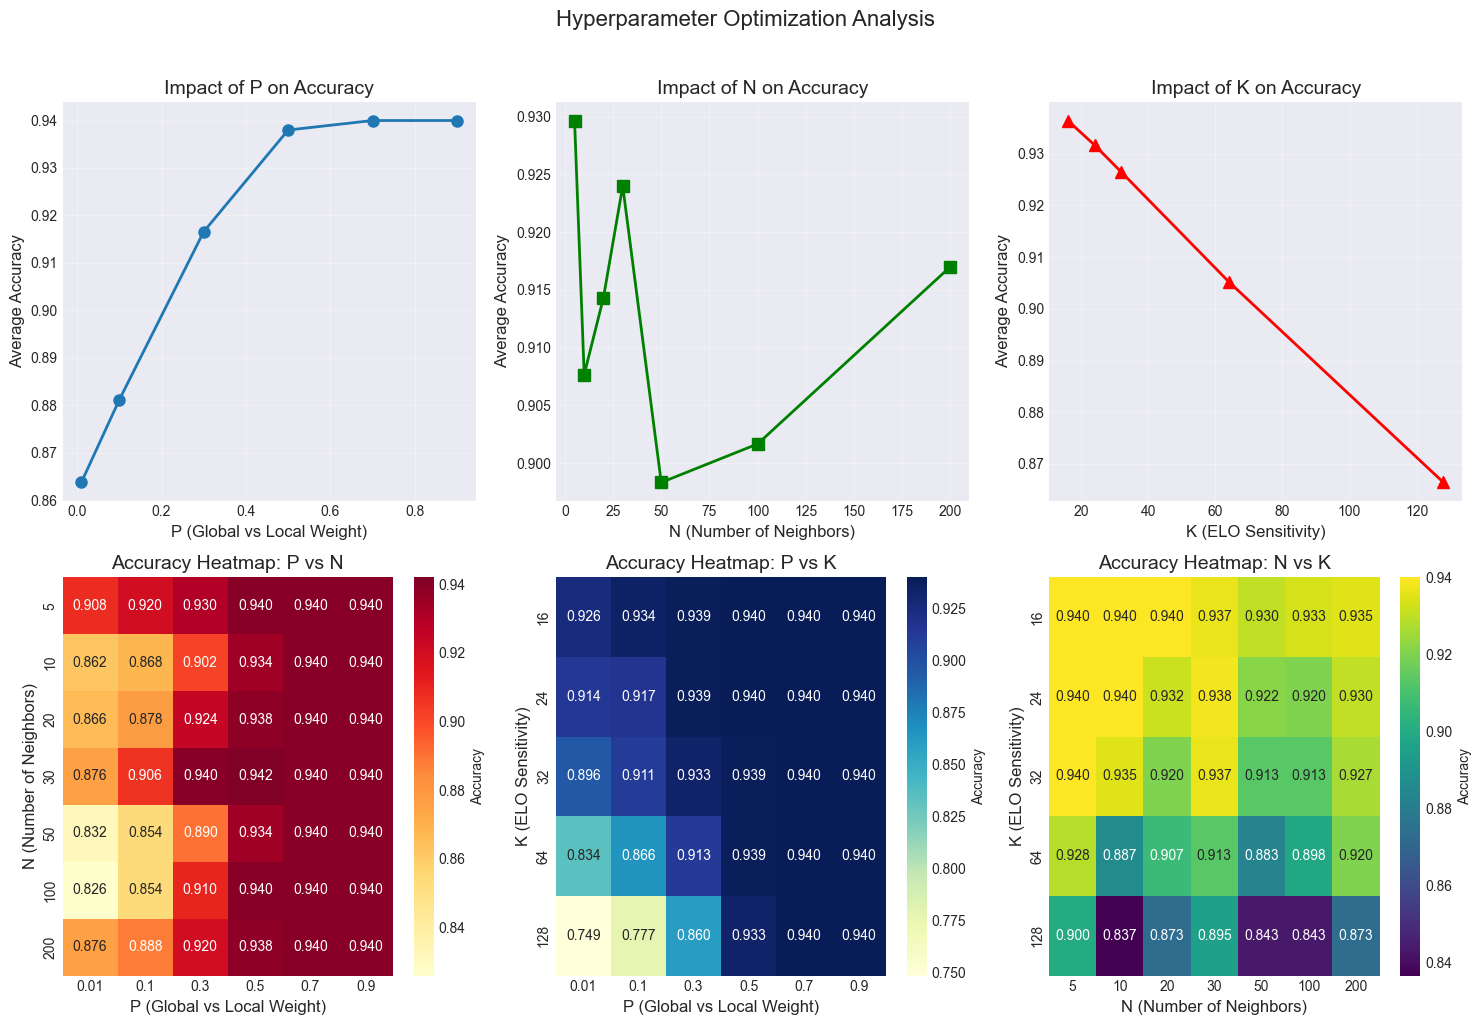

In [ ]:
# Visualize hyperparameter optimization results
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
plt.style.use('seaborn-v0_8-darkgrid')
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Average accuracy by P value
p_avg = results_df.groupby('P')['accuracy'].mean().reset_index()
axes[0, 0].plot(p_avg['P'], p_avg['accuracy'], marker='o', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('P (Global vs Local Weight)', fontsize=12)
axes[0, 0].set_ylabel('Average Accuracy', fontsize=12)
axes[0, 0].set_title('Impact of P on Accuracy', fontsize=14)
axes[0, 0].grid(True, alpha=0.3)

# 2. Average accuracy by N value
n_avg = results_df.groupby('N')['accuracy'].mean().reset_index()
axes[0, 1].plot(n_avg['N'], n_avg['accuracy'], marker='s', linewidth=2, markersize=8, color='green')
axes[0, 1].set_xlabel('N (Number of Neighbors)', fontsize=12)
axes[0, 1].set_ylabel('Average Accuracy', fontsize=12)
axes[0, 1].set_title('Impact of N on Accuracy', fontsize=14)
axes[0, 1].grid(True, alpha=0.3)

# 3. Average accuracy by K value
k_avg = results_df.groupby('K')['accuracy'].mean().reset_index()
axes[0, 2].plot(k_avg['K'], k_avg['accuracy'], marker='^', linewidth=2, markersize=8, color='red')
axes[0, 2].set_xlabel('K (ELO Sensitivity)', fontsize=12)
axes[0, 2].set_ylabel('Average Accuracy', fontsize=12)
axes[0, 2].set_title('Impact of K on Accuracy', fontsize=14)
axes[0, 2].grid(True, alpha=0.3)

# 4. Heatmap for P vs N (averaged over K)
pn_pivot = results_df.pivot_table(values='accuracy', index='N', columns='P', aggfunc='mean')
sns.heatmap(pn_pivot, annot=True, fmt='.3f', cmap='YlOrRd', ax=axes[1, 0], cbar_kws={'label': 'Accuracy'})
axes[1, 0].set_xlabel('P (Global vs Local Weight)', fontsize=12)
axes[1, 0].set_ylabel('N (Number of Neighbors)', fontsize=12)
axes[1, 0].set_title('Accuracy Heatmap: P vs N', fontsize=14)

# 5. Heatmap for P vs K (averaged over N)
pk_pivot = results_df.pivot_table(values='accuracy', index='K', columns='P', aggfunc='mean')
sns.heatmap(pk_pivot, annot=True, fmt='.3f', cmap='YlGnBu', ax=axes[1, 1], cbar_kws={'label': 'Accuracy'})
axes[1, 1].set_xlabel('P (Global vs Local Weight)', fontsize=12)
axes[1, 1].set_ylabel('K (ELO Sensitivity)', fontsize=12)
axes[1, 1].set_title('Accuracy Heatmap: P vs K', fontsize=14)

# 6. Heatmap for N vs K (averaged over P)
nk_pivot = results_df.pivot_table(values='accuracy', index='K', columns='N', aggfunc='mean')
sns.heatmap(nk_pivot, annot=True, fmt='.3f', cmap='viridis', ax=axes[1, 2], cbar_kws={'label': 'Accuracy'})
axes[1, 2].set_xlabel('N (Number of Neighbors)', fontsize=12)
axes[1, 2].set_ylabel('K (ELO Sensitivity)', fontsize=12)
axes[1, 2].set_title('Accuracy Heatmap: N vs K', fontsize=14)

plt.suptitle('Hyperparameter Optimization Analysis', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()
